# Morphological Transformation

Operation like Erossion, dialation, opening and closing methods.

What are M - simple operations based on image shape, it is performed on binary image, there are two things required. Mask to threshold.
1. Original image
2. Kernel (which decides the nature of operations)

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [5]:
image = cv.imread('smarties.jpg', cv.IMREAD_GRAYSCALE)

In [10]:
#threshold values:(image, value of threshold, max value of threshold, and threshold filter)
#after masking we can see Mark image has black dots in region

_, mask = cv.threshold(image, 220, 255, cv.THRESH_BINARY_INV)

In [40]:
kernel = np.ones((2,2), np.uint8) #define kernel 

### Dialation (increases the area of white)
remove the black dots from mark image, we shall use Dilation.
Kernel is is shape we want to apply on image, we shall use white(np.ones), sqaure shape of 2x2
values: (image, kernel, iteration(default=1))

use dialtion steps to remove black dots on white space
1. increase the number interation
2. increase the size of filter, issue with this - this will increase the white space, and may merge the dilation area.

In [27]:
dilation = cv.dilate(mask, kernel, iterations=2) #increase the iteration to remove black dots in white space

## Erosion(reduces by eroding the edges away)

Using the same kernel, erosion, removes the sides are eroded all the image. It erodes away the boundry area of foreground object. The kernel slides through all image, pixel in original image (1/0) will be considered as 1, ONLY IF all the pixels under the kernel is 1 else it will put as 0 as it will be eroded. 

values:(image,kernel, optional(iteration) default =1)

In [41]:
erosion = cv.erode(mask, kernel,iterations=1)

## Opening and Closing Morphological Transform 

Opening is another name for erosion, and then the dilation will be performed on the image.

Closing is opposite, dilation is performed first and then ersosion will be perfromed.

value:(source, type of morph. operation, Kernel)

In [50]:
opening = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel)

In [51]:
closing = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel)

In [64]:
mg = cv.morphologyEx(mask, cv.MORPH_GRADIENT, kernel) #difference dilation and erosion of image

In [65]:
toph = cv.morphologyEx(mask, cv.MORPH_TOPHAT, kernel) #difference input image and opening of image

In [66]:
titles = ['Originial', 'Mask', 'dilation', 'erosion', 'opening', 'closing', 'gradiant', 'top_hat']
images = [image, mask, dilation, erosion, opening, closing, mg, toph]

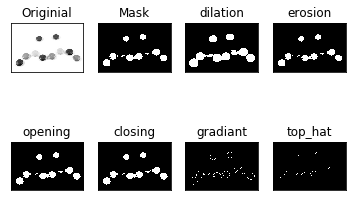

In [68]:
for i in range(8):
    plt.subplot(2, 4, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()
    